In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# 필요한 패키지와 라이브러리를 가져옴
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
path = 'C:\\Users\\JuhoSon\\AppData\\Local\\Microsoft\\Windows\\Fonts\\NanumGothicCoding-Bold.ttf'
font_name = fm.FontProperties(fname=path, size=50).get_name()
plt.rc('font', family=font_name)

# GS Retail

In [21]:
df_gs = pd.read_csv('./data/innovation/create/df_gs_nowon.csv')

In [22]:
df_gs.astype(int).head()

,LCLS_10_P,LCLS_20_P,LCLS_30_P,LCLS_40_P,LCLS_50_P,LCLS_60_P,LCLS_70_P,LCLS_80_P
0,5775959,4653959,7123695,460575,888967,102938,158304,125768
1,5798567,4068039,6922593,517274,732014,85751,189721,159773
2,5882238,4045718,6679633,396954,694118,109181,146743,83460
3,6163597,4284198,6238373,400734,914432,106260,133827,85526
4,6131852,3723724,5135552,430144,1099378,120809,149481,89173


In [6]:
df_gs.shape

(365, 8)

In [7]:
# df_gs_total = df_gs_total.groupby(['DATE', 'GU_NM']).mean().reset_index()

# ShinHan Card

In [8]:
df_card = pd.read_csv('./data/innovation/create/df_shinhan_nowon.csv')

In [9]:
df_card.head()

,age20숙박,age20레저용품,age20레저업소,age20문화취미,age20가구,age20전기,age20주방,age20연료,age20광학,age20가전,...,age50신변잡화,age50서적문구,age50사무통신,age50자동차판매,age50자동차정비,age50의료기관,age50보건위생,age50요식업소,age50음료식품,age50수리서비스
0,432.0,203.0,7993.0,1551.0,21.0,NaN,NaN,498.0,29.0,25.0,...,72.0,760.0,NaN,NaN,58.0,978.0,1877.0,14351.0,2763.0,99.0
1,105.0,131.0,5367.0,791.0,NaN,NaN,NaN,470.0,63.0,70.0,...,140.0,687.0,43.0,NaN,264.0,8666.0,1307.0,13421.0,3256.0,337.0
2,87.0,126.0,5656.0,526.0,NaN,NaN,18.0,384.0,42.0,43.0,...,107.0,669.0,25.0,NaN,241.0,7405.0,1381.0,13933.0,3392.0,276.0
3,151.0,165.0,5300.0,534.0,NaN,NaN,NaN,308.0,80.0,74.0,...,107.0,659.0,NaN,NaN,198.0,6935.0,1335.0,14271.0,3537.0,347.0
4,187.0,109.0,6001.0,729.0,NaN,NaN,NaN,312.0,89.0,60.0,...,76.0,549.0,29.0,NaN,149.0,6381.0,1278.0,13619.0,3470.0,140.0


In [10]:
df_card.shape

(365, 92)

# SKT population

In [11]:
df_skt = pd.read_csv('./data/innovation/create/df_skt_nowon.csv')

In [12]:
df_skt.head()

,age20,age30,age40,age50
0,276375.29,265602.51,326534.25,326373.41
1,362157.39,286616.48,374955.29,369821.56
2,364140.16,296960.76,391194.83,384986.42
3,355365.76,298269.85,388102.91,377589.84
4,343828.64,289595.03,376708.57,361374.41


In [13]:
df_skt.shape

(365, 4)

# asos

In [14]:
df_asos = pd.read_csv('./data/innovation/create/df_asos_nowon.csv')

In [15]:
df_asos.columns

Index(['noise', 'temp', 'humi', 'pm10', 'pm25', 'DATE', 'CONTENT', '강수량(mm)'], dtype='object')

In [16]:
df_asos.drop(['DATE', 'noise'], axis=1, inplace=True)

In [17]:
df_asos.head()

,temp,humi,pm10,pm25,CONTENT,강수량(mm)
0,16.580764,56.770833,68.127083,35.221528,515,0.0
1,19.631111,57.827083,71.924306,29.909028,888,0.0
2,19.192500,61.674306,72.979861,24.331944,856,0.1
3,14.075417,60.129861,18.221528,10.952778,893,18.5
4,8.620000,77.163194,8.854861,3.891667,864,10.5


# Merge Data

In [18]:
df_asos.shape, df_card.shape, df_skt.shape, df_gs.shape

((365, 6), (365, 92), (365, 4), (365, 8))

In [19]:
dateidx = pd.date_range('2018-04-01', '2019-03-31')
df_asos= df_asos.set_index(dateidx)
df_skt = df_skt.set_index(dateidx)
df_gs = df_gs.set_index(dateidx)
df_card = df_card.set_index(dateidx)

In [20]:
df_total = df_card.merge(df_skt, on=df_card.index).set_index('key_0')
df_total = df_total.merge(df_gs, on=df_total.index).set_index('key_0')
df_total = df_total.merge(df_asos, on=df_total.index).set_index('key_0')

# 20, 30, 40, 50대 데이터로 구분하기

In [24]:
df_total.head()

,age20숙박,age20레저용품,age20레저업소,age20문화취미,age20가구,age20전기,age20주방,age20연료,age20광학,age20가전,...,LCLS_50_P,LCLS_60_P,LCLS_70_P,LCLS_80_P,temp,humi,pm10,pm25,CONTENT,강수량(mm)
key_0,,,,,,,,,,,,,,,,,,,,,
2018-04-01,432.0,203.0,7993.0,1551.0,21.0,NaN,NaN,498.0,29.0,25.0,...,8.889679e+05,102938.908335,158304.695151,125768.139866,16.580764,56.770833,68.127083,35.221528,515,0.0
2018-04-02,105.0,131.0,5367.0,791.0,NaN,NaN,NaN,470.0,63.0,70.0,...,7.320147e+05,85751.772442,189721.667844,159773.285544,19.631111,57.827083,71.924306,29.909028,888,0.0
2018-04-03,87.0,126.0,5656.0,526.0,NaN,NaN,18.0,384.0,42.0,43.0,...,6.941187e+05,109181.181977,146743.364491,83460.961960,19.192500,61.674306,72.979861,24.331944,856,0.1
2018-04-04,151.0,165.0,5300.0,534.0,NaN,NaN,NaN,308.0,80.0,74.0,...,9.144325e+05,106260.195832,133827.487702,85526.543799,14.075417,60.129861,18.221528,10.952778,893,18.5
2018-04-05,187.0,109.0,6001.0,729.0,NaN,NaN,NaN,312.0,89.0,60.0,...,1.099378e+06,120809.906702,149481.681510,89173.629481,8.620000,77.163194,8.854861,3.891667,864,10.5


In [22]:
# AMT_list = ['숙박_USE_AMT', '레저용품_USE_AMT','레저업소_USE_AMT', '문화취미_USE_AMT', '가구_USE_AMT', '전기_USE_AMT',
#                   '주방_USE_AMT', '연료_USE_AMT', '광학_USE_AMT', '가전_USE_AMT', '유통업_USE_AMT',
#                   '의복_USE_AMT', '직물_USE_AMT', '신변잡화_USE_AMT','서적문구_USE_AMT', '사무통신_USE_AMT',
#                   '자동차판매_USE_AMT', '자동차정비_USE_AMT', '의료기관_USE_AMT', '보건위생_USE_AMT', '요식업소_USE_AMT',
#                   '음료식품_USE_AMT', '수리서비스_USE_AMT']
# age_list = ['age20', 'age30', 'age40', 'age50']

In [23]:
AMT_list = ['숙박', '레저용품','레저업소', '문화취미', '가구', '전기',
                  '주방', '연료', '광학', '가전', '유통업',
                  '의복', '직물', '신변잡화','서적문구', '사무통신',
                  '자동차판매', '자동차정비', '의료기관', '보건위생', '요식업소',
                  '음료식품', '수리서비스']
age_list = ['age20', 'age30', 'age40', 'age50']

In [24]:
base_cols = ['LCLS_10_P', 'LCLS_20_P', 'LCLS_30_P', 'LCLS_40_P', 
        'LCLS_50_P', 'LCLS_60_P', 'LCLS_70_P', 'LCLS_80_P', 
        
        'pm10', 'pm25', 'CONTENT', 'temp', 'humi', '강수량(mm)'
        ]

In [25]:
age20_cols = ['age20'+i for i in AMT_list]+['age20']+base_cols  # 23개업종 1개인구 8개카테고리, 6개기상데이터 총 38
age30_cols = ['age30'+i for i in AMT_list]+['age30']+base_cols
age40_cols = ['age40'+i for i in AMT_list]+['age40']+base_cols
age50_cols = ['age50'+i for i in AMT_list]+['age50']+base_cols

In [26]:
df_20 = df_total[age20_cols]
df_30 = df_total[age30_cols]
df_40 = df_total[age40_cols]
df_50 = df_total[age50_cols]

In [27]:
df_20.shape, df_30.shape, df_40.shape, df_50.shape

((365, 38), (365, 38), (365, 38), (365, 38))

In [28]:
df_20.to_csv('./data/innovation/create/df_age20.csv', index=False)
df_30.to_csv('./data/innovation/create/df_age30.csv', index=False)
df_40.to_csv('./data/innovation/create/df_age40.csv', index=False)
df_50.to_csv('./data/innovation/create/df_age50.csv', index=False)

In [26]:
df_total.to_csv('./data/innovation/create/df_total_nowon.csv', index=False)

# boxplot

In [1]:
card_recols=['숙박',
 '레저용품',
 '레저업소',
 '문화취미',
 '가구',
 '전기',
 '주방',
 '연료',
 '광학',
 '가전',
 '유통업',
 '의복',
 '직물',
 '신변잡화',
 '서적문구',
 '사무통신',
 '자동차판매',
 '자동차정비',
 '의료기관',
 '보건위생',
 '요식업소',
 '음료식품',
 '수리서비스']

In [2]:
card_cols = ['age20숙박_USE_AMT',
 'age20레저용품_USE_AMT',
 'age20레저업소_USE_AMT',
 'age20문화취미_USE_AMT',
 'age20가구_USE_AMT',
 'age20전기_USE_AMT',
 'age20주방_USE_AMT',
 'age20연료_USE_AMT',
 'age20광학_USE_AMT',
 'age20가전_USE_AMT',
 'age20유통업_USE_AMT',
 'age20의복_USE_AMT',
 'age20직물_USE_AMT',
 'age20신변잡화_USE_AMT',
 'age20서적문구_USE_AMT',
 'age20사무통신_USE_AMT',
 'age20자동차판매_USE_AMT',
 'age20자동차정비_USE_AMT',
 'age20의료기관_USE_AMT',
 'age20보건위생_USE_AMT',
 'age20요식업소_USE_AMT',
 'age20음료식품_USE_AMT',
 'age20수리서비스_USE_AMT']

gs_cols = ['LCLS_10_P',
 'LCLS_20_P',
 'LCLS_30_P',
 'LCLS_40_P',
 'LCLS_50_P',
 'LCLS_60_P',
 'LCLS_70_P',
 'LCLS_80_P']

x_cols = ['age20', 
          'pm10',
 'pm25',
 'CONTENT',
 'temp']
    

C:\Users\JuhoSon\Miniconda3\envs\2019BigC\lib\site-packages\numpy\lib\function_base.py:3826: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
C:\Users\JuhoSon\Miniconda3\envs\2019BigC\lib\site-packages\matplotlib\cbook\__init__.py:1316: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
C:\Users\JuhoSon\Miniconda3\envs\2019BigC\lib\site-packages\matplotlib\cbook\__init__.py:1323: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = x[x >= loval]
C:\Users\JuhoSon\Miniconda3\envs\2019BigC\lib\site-packages\matplotlib\cbook\__init__.py:1331: RuntimeWarning: invalid value encountered in less
  x[x < stats['whislo']],
C:\Users\JuhoSon\Miniconda3\envs\2019BigC\lib\site-packages\matplotlib\cbook\__init__.py:1332: RuntimeWarning: invalid value encountered in greater
  x[x > stats['whishi']],


([<matplotlib.axis.XTick at 0x1a427e7d240>,
 <a list of 23 Text xticklabel objects>)

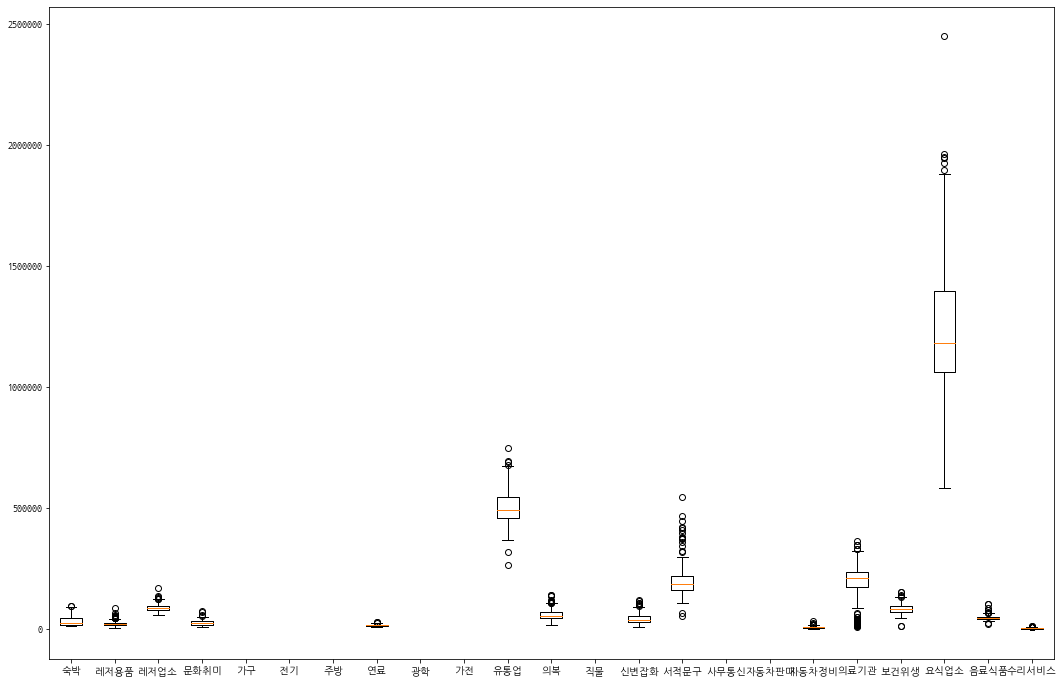

In [102]:
plt.figure(figsize=(18,12))
plt.boxplot(df_20[card_cols].values)
plt.xticks(list(range(1,len(card_cols)+1)), card_recols)